# Seaborn을 이용한 주요 시각화 그래프

- Seaborn 공식 사이트 : https://seaborn.pydata.org/tutorial.html
- Matplotlib 기반으로 쉽게 작성됨. Matplotlib의 high level API
- Matplotlib 보다 수려한 디자인을 제공하며 Pandas와 쉽게 연동
- 그러나 Matplotlib을 어느 정도 알고 있어야함

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

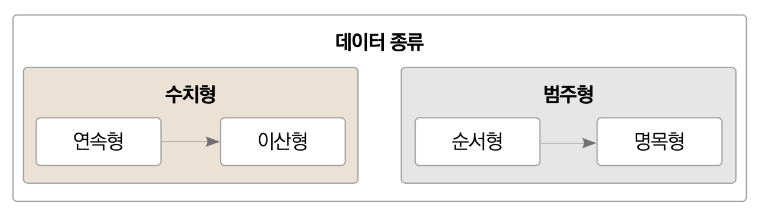

In [2]:
from IPython.display import Image
Image('./images/graph1.png')

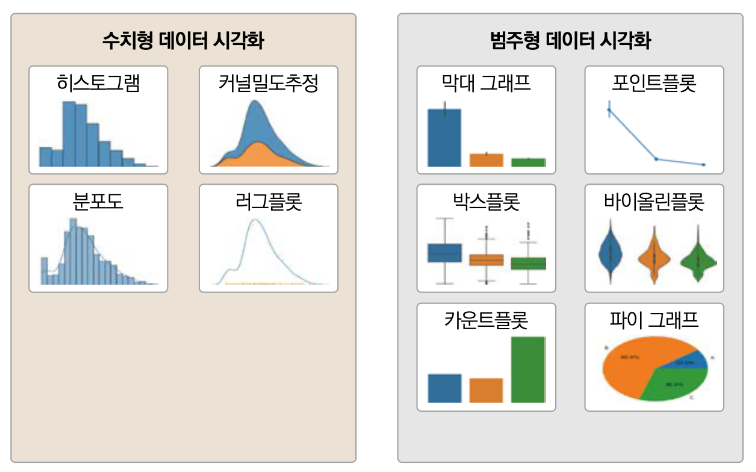

In [ ]:
Image('./images/graph2.png')

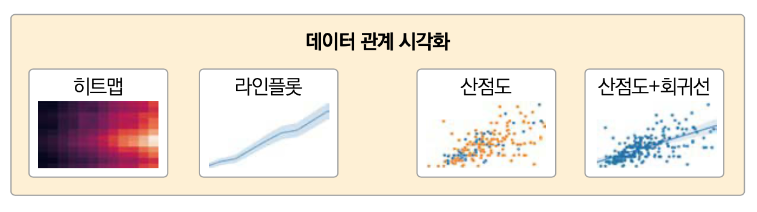

In [ ]:
Image('./images/graph3.png')

In [2]:
titanic_df = pd.read_csv('./datasets/titanic_train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 수치형 데이터 시각화

### 1. 히스토그램
- 수치형 데이터의 구간별 빈도수를 나타내는 그래프

- matplotlib 지원

In [4]:
titanic_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

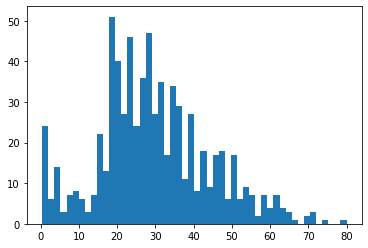

In [9]:
hist = plt.hist(titanic_df['Age'], bins = 50)

In [10]:
hist[0] # frequency
hist[1] # bins

array([ 0.42  ,  2.0116,  3.6032,  5.1948,  6.7864,  8.378 ,  9.9696,
       11.5612, 13.1528, 14.7444, 16.336 , 17.9276, 19.5192, 21.1108,
       22.7024, 24.294 , 25.8856, 27.4772, 29.0688, 30.6604, 32.252 ,
       33.8436, 35.4352, 37.0268, 38.6184, 40.21  , 41.8016, 43.3932,
       44.9848, 46.5764, 48.168 , 49.7596, 51.3512, 52.9428, 54.5344,
       56.126 , 57.7176, 59.3092, 60.9008, 62.4924, 64.084 , 65.6756,
       67.2672, 68.8588, 70.4504, 72.042 , 73.6336, 75.2252, 76.8168,
       78.4084, 80.    ])

- pandas에서 직접 호출 가능

<AxesSubplot:>

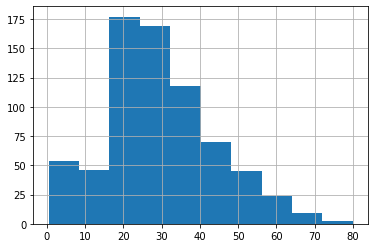

In [11]:
titanic_df['Age'].hist()

- seaborn 지원

<AxesSubplot:xlabel='Age', ylabel='Count'>

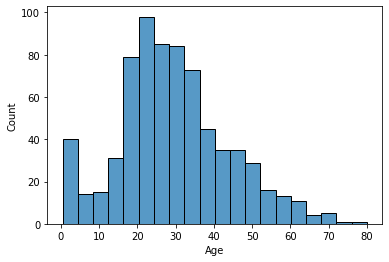

In [29]:
sns.histplot(data = titanic_df, x = 'Age', bins = 20)

<AxesSubplot:xlabel='Age', ylabel='Count'>

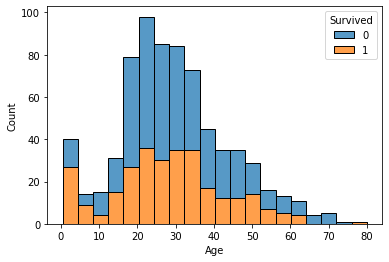

In [28]:
sns.histplot(data = titanic_df, x = 'Age', bins = 20, hue = 'Survived', multiple = 'stack')

<AxesSubplot:xlabel='Age', ylabel='Count'>

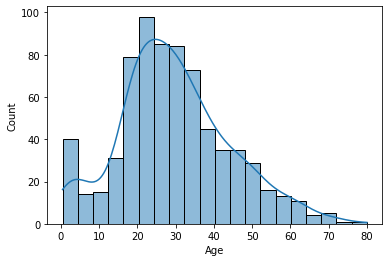

In [27]:
sns.histplot(data = titanic_df, x = 'Age', bins = 20, kde = True)

### 2. 커널밀도추정 함수

- 히스토그램을 매끄럽게 곡선으로 연결한 그래프

<AxesSubplot:xlabel='Age', ylabel='Density'>

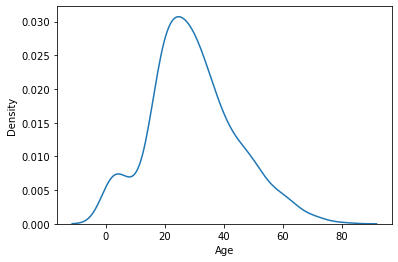

In [26]:
sns.kdeplot(data = titanic_df, x = 'Age')

<AxesSubplot:xlabel='Age', ylabel='Density'>

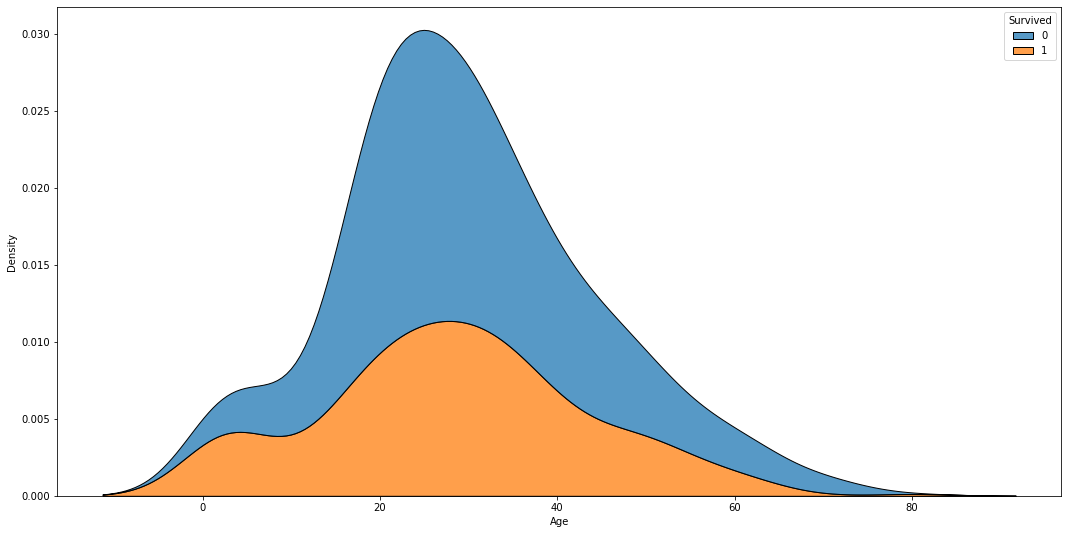

In [33]:
plt.figure(figsize = (18, 9)) # Axes level API는 matplotlib에서 저장한 figsize에 영향을 받지 않음
sns.kdeplot(data = titanic_df, x = 'Age', hue = 'Survived', multiple = 'stack')

<Figure size 1296x648 with 0 Axes>

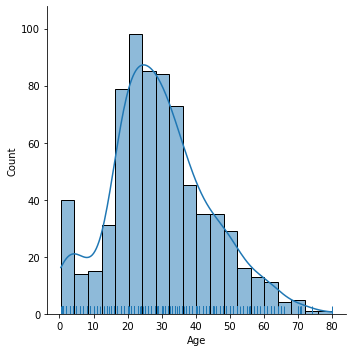

In [38]:
plt.figure(figsize=(18, 9)) # Figure level API는 matplotlib에서 지정한 figsize에 영향을 받지않음
sns.displot(data = titanic_df, x = 'Age', kde = True, rug = True)

## 범주형 데이터 시각화

### 1. 막대그래프(barplot)
- 범주형 데이터 값에 따라 수치형 데이터 값이 어떻게 달라지는지 파악할 때 사용
- 범주형 데이터에 따른 수치형 데이터의 평균과 신뢰구간을 그려줌
- 수치형 데이터 평균은 막대높이로, 신뢰구간은 오차 막대로 표현함

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

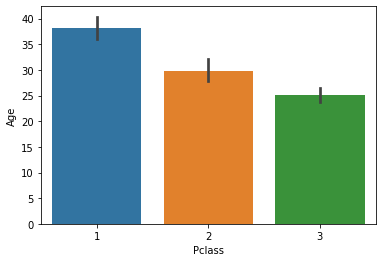

In [43]:
sns.barplot(data = titanic_df, x = 'Pclass', y = 'Age')  # ci = None이면 오차막대가 표시되지 않음

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

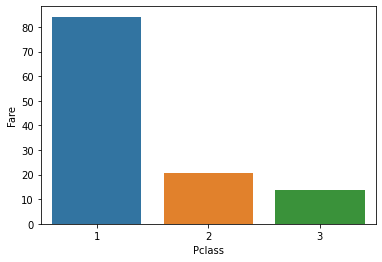

In [47]:
sns.barplot(data = titanic_df, x = 'Pclass', y = 'Fare', ci = None)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

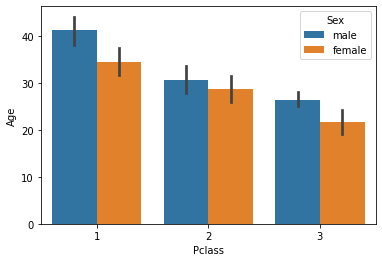

In [48]:
sns.barplot(data = titanic_df, x = 'Pclass', y = 'Age', hue = 'Sex')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

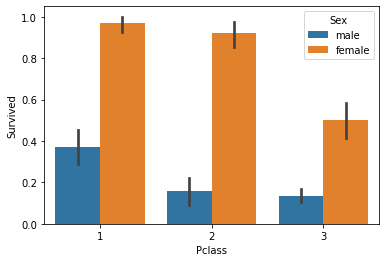

In [49]:
sns.barplot(data = titanic_df, x = 'Pclass', y = 'Survived', hue = 'Sex')

In [50]:
bins = [0, 18, 25, 35, 60, 80]
group_names = ['Children', 'Youth', 'YoungAdult','MiddleAged', 'Senior']
titanic_df['Age_cat']= pd.cut(titanic_df['Age'], bins, labels=group_names)

In [51]:
titanic_df['Age_cat']

0           Youth
1      MiddleAged
2      YoungAdult
3      YoungAdult
4      YoungAdult
          ...    
886    YoungAdult
887         Youth
888           NaN
889    YoungAdult
890    YoungAdult
Name: Age_cat, Length: 891, dtype: category
Categories (5, object): ['Children' < 'Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

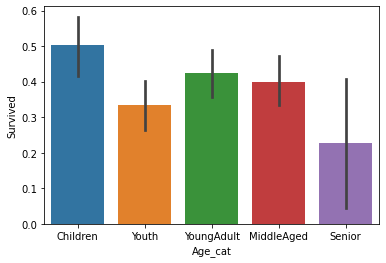

In [52]:
sns.barplot(data = titanic_df, x = 'Age_cat', y = 'Survived')

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

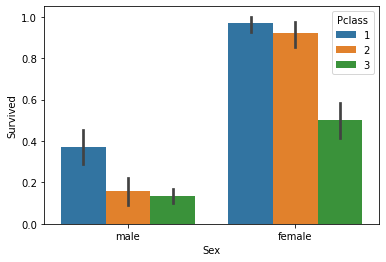

In [54]:
sns.barplot(data = titanic_df, x = 'Sex', y = 'Survived', hue = 'Pclass')

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

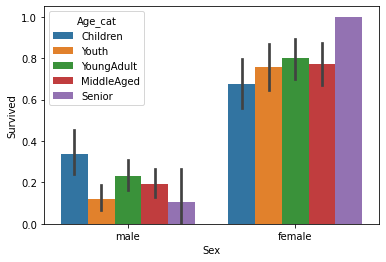

In [55]:
sns.barplot(data = titanic_df, x = 'Sex', y = 'Survived', hue = 'Age_cat')

### 2. 포인트 플롯(pointplot)
- 막대 그래프와 모양만 다를 뿐 동일한 정보 제공
- 막대 그래프와 마찬가지로 범주형 데이터에 따른 수치형 데이터의 평균과 신뢰구간을 나타냄
- 다만 그래프를 점과 선으로 나타냄

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

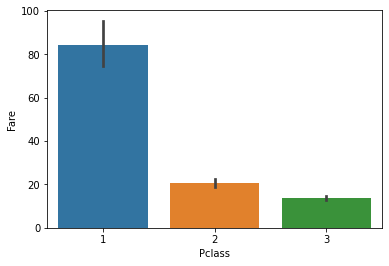

In [113]:
sns.barplot(data = titanic_df, x = 'Pclass', y = 'Fare')

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

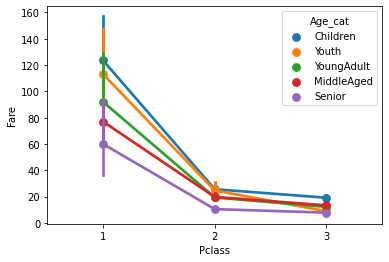

In [60]:
sns.pointplot(data = titanic_df, x = 'Pclass', y = 'Fare', hue ='Age_cat')

### 3. 박스플롯(boxplot)
- 막대그래프나 포인트플롯보다 더 많은 정보를 제공
- 5가지 요약 수치 : 최솟값, 1사분위수(Q1), 2사분위수(Q2), 3사분위수(Q3), 최댓값

- 1사분위수(Q1) : 전체 데이터 중 하위 25%에 해당하는 값
- 2사분위수(Q2): 50%에 해당하는 값 
- 3사분위수(Q3) : 상위 25%에 해당하는 값
- 사분위 범위수(IQR) : Q3 - Q1
- 최댓값(Max) : Q3 + (1.5 * IQR)
- 최솟값(Min) : Q1 - (1.5 * IQR)

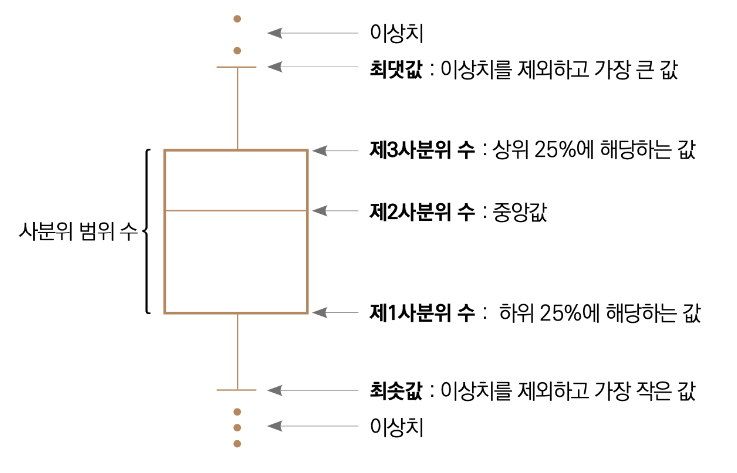

In [ ]:
Image('./images/boxplot.png')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

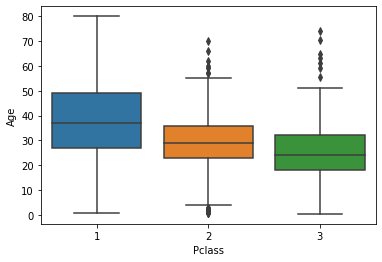

In [65]:
sns.boxplot(data = titanic_df, x = 'Pclass', y = 'Age')

### 4. 바이올린플롯(violinplot)
- 박스플롯과 커널밀도추정 함수 그래프를 합쳐 놓은 그래프
- 박스플롯에 제공하는 정보를 모두 포함하며, 모양은 커널밀도추정 함수 그래프 형태임

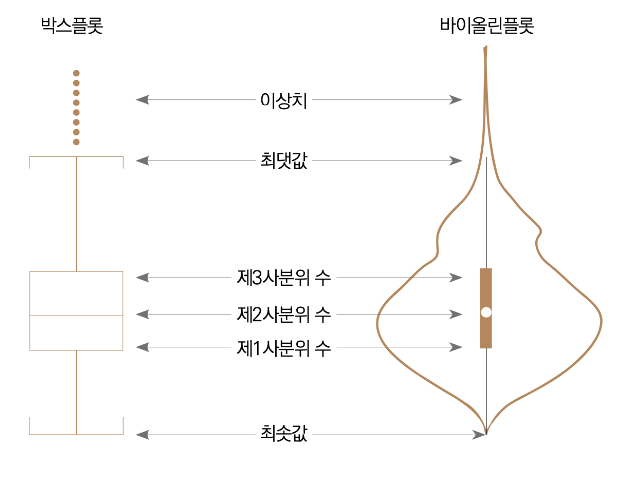

In [ ]:
Image('./images/violinplot.png')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

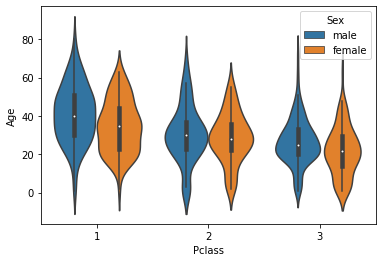

In [70]:
sns.violinplot(data = titanic_df, x = 'Pclass', y = 'Age', hue = 'Sex')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

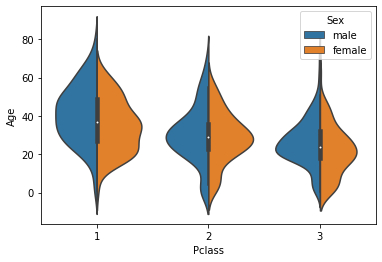

In [72]:
sns.violinplot(data = titanic_df, x = 'Pclass', y = 'Age', hue = 'Sex', split = True)

### 5. 카운트플롯(countplot)
- 카운트플롯은 범주형 데이터의 개수를 확인할 때 사용하는 그래프
- 주로 범주형 피처나 범주형 타깃값의 분포가 어떤지 파악하는 용도로 사용
- 카운트플롯을 사용하면 범주형 데이터의 개수를 파악할 수 있음


<AxesSubplot:xlabel='Age', ylabel='count'>

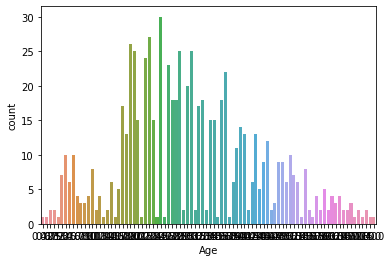

In [69]:
sns.countplot(data = titanic_df, x = 'Age')

### 6. 파이 그래프(pie)
- 범주형 데이터별 비율을 알아볼 때 사용하기 좋은 그래프
- seaborn에서 파이 그래프를 지원하지 않아 matplotlib을 사용

In [84]:
data = titanic_df['Pclass'].value_counts()

<AxesSubplot:ylabel='Pclass'>

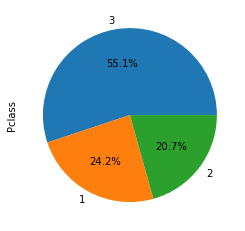

In [87]:
data.plot(kind = 'pie', autopct = '%.1f%%')

## 데이터 관계 시각화

### 1. 히트맵(heatmap)
- 데이터 간 관계를 색상으로 표현한 그래프
- 비교해야 할 데이터가 많을 때 주로 사용

<AxesSubplot:>

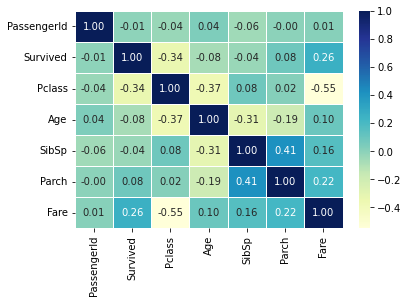

In [90]:
corr = titanic_df.corr()
sns.heatmap(corr, annot = True, fmt = '.2f', cmap = 'YlGnBu', linewidth = 0.5)

* [컬러맵 정보](https://matplotlib.org/stable/tutorials/colors/colormaps.html)


### 2. 산점도(scatterplot)
- 산점도는 두 데이터의 관계를 점으로 표현하는 그래프

<AxesSubplot:xlabel='Age', ylabel='Fare'>

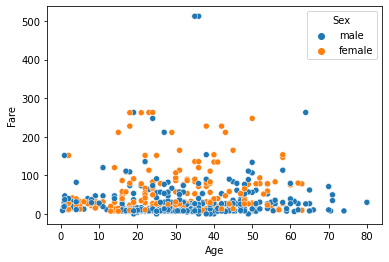

In [93]:
sns.scatterplot(data = titanic_df, x = 'Age', y = 'Fare', hue = 'Sex')

<AxesSubplot:xlabel='Age', ylabel='Fare'>

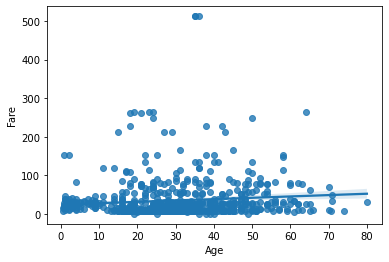

In [94]:
sns.regplot(data = titanic_df, x = 'Age', y = 'Fare')

## seaborn에서 subplots 이용하기 

#### (1) subplots을 이용하여 주요 category성 컬럼의 건수를 시각화 하기

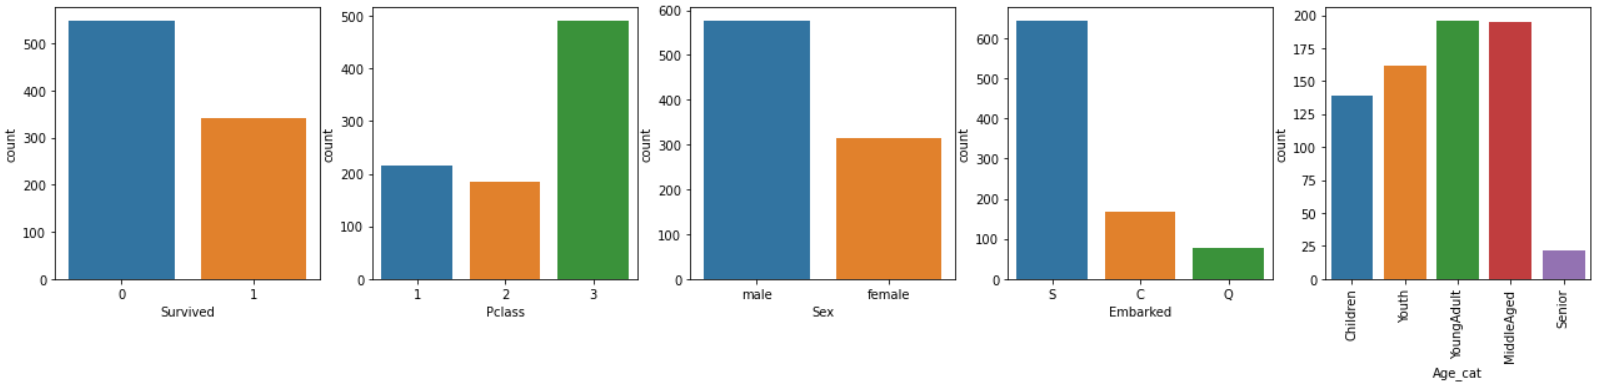

<AxesSubplot:xlabel='Age_cat', ylabel='count'>

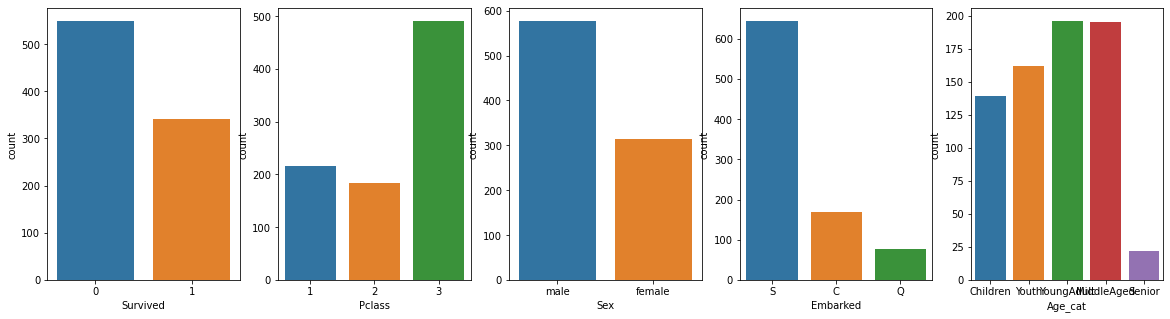

In [149]:
figure, axes = plt.subplots(nrows = 1, ncols = 5, figsize = (20, 5))

sns.countplot(data = titanic_df, x = 'Survived', ax = axes[0])
sns.countplot(data = titanic_df, x = 'Pclass', ax = axes[1])
sns.countplot(data = titanic_df, x = 'Sex', ax = axes[2])
sns.countplot(data = titanic_df, x = 'Embarked', ax = axes[3])
sns.countplot(data = titanic_df, x = 'Age_cat', ax = axes[4])

[Text(0, 0, 'Children'), Text(1, 0, 'Youth'), Text(2, 0, 'YoungAdult'), Text(3, 0, 'MiddleAged'), Text(4, 0, 'Senior')]


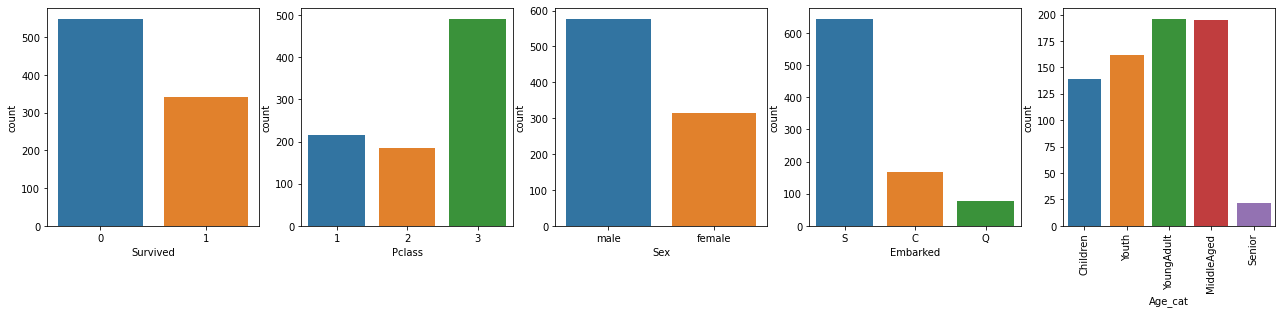

In [150]:
cat_columns = ["Survived", "Pclass", "Sex", "Embarked", "Age_cat"]

figrue, axes = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(22, 4))

for index, column in enumerate(cat_columns):
    sns.countplot(data=titanic_df, x=column, ax=axes[index] )
    if (index == 4):
        print(axes[4].get_xticklabels())
        axes[4].set_xticklabels(axes[4].get_xticklabels(), rotation=90)

#### (2) subplots을 이용하여 주요 category성 컬럼별로 컬럼값에 따른 생존율 시각화 하기

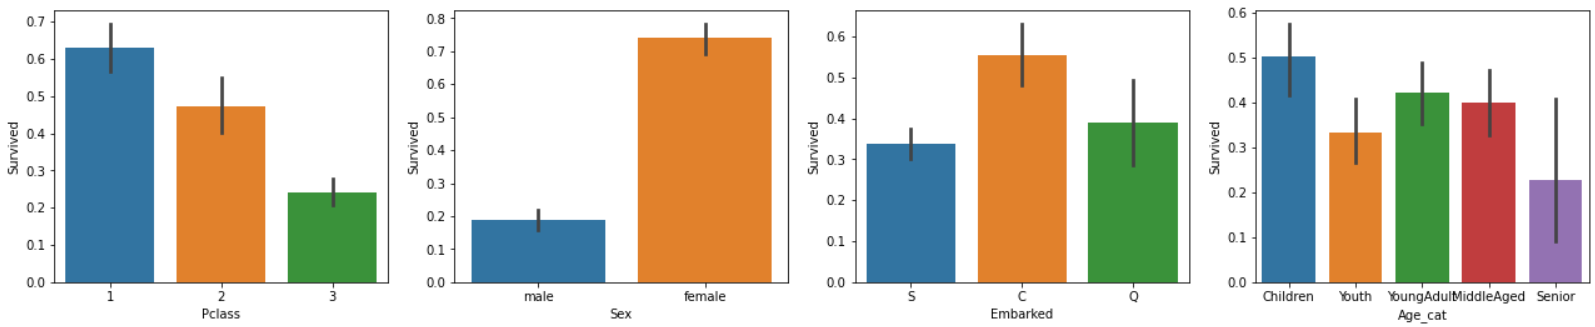

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

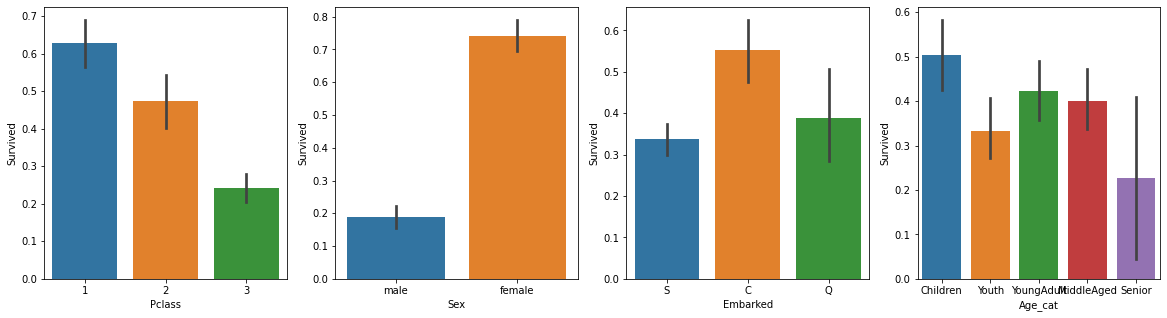

In [144]:
figure, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20, 5))

sns.barplot(data = titanic_df, x = 'Pclass', y = 'Survived', ax = axes[0])
sns.barplot(data = titanic_df, x = 'Sex', y = 'Survived', ax = axes[1])
sns.barplot(data = titanic_df, x = 'Embarked', y = 'Survived', ax = axes[2])
sns.barplot(data = titanic_df, x = 'Age_cat', y = 'Survived', ax = axes[3])

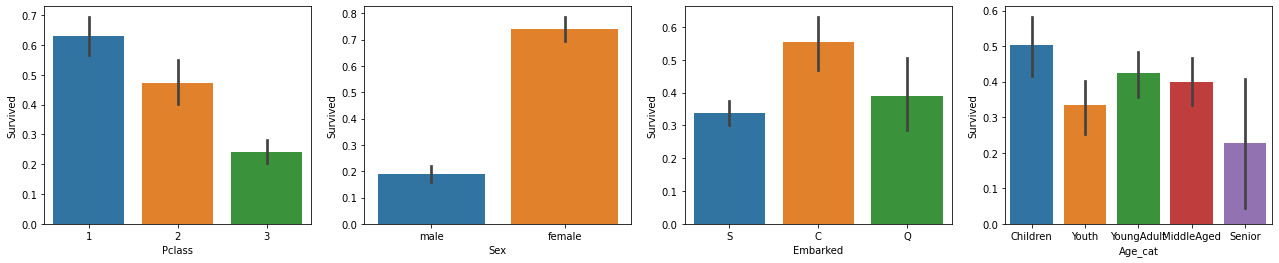

In [151]:
cat_columns = ["Pclass", "Sex", "Embarked", "Age_cat"]

figrue, axes = plt.subplots(nrows=1, ncols=len(cat_columns), figsize=(22, 4))

for index, column in enumerate(cat_columns):
    sns.barplot(data=titanic_df, x=column, y="Survived", ax=axes[index])